# Análisis de incidencia delectiva en el estado de Tabasco del periodo 2015 a 2023

La información ha sido obtenida a través de la página oficial del gobierno de México, [link](https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva?state=published), siendo ***Datos abiertos de Incidencia Delicitiva***. Incluyen información desde 2015 hasta junio 2023.

Con una limpieza previa de datos, se selecciono únicamente al estado de Tabasco y se separo en dos Datasets para no tener valores nulos, la información desde 2015 a 2022 y la información del 2023

Vamos a ver los datos

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

CURRENT_DIR = Path('.').resolve()
MODULES_DIR = CURRENT_DIR.parent.joinpath('src')
sys.path.append(str(MODULES_DIR))
DATA_DIR = CURRENT_DIR.parent.joinpath('Data')

In [2]:
df_15_22 = pd.read_csv(str(DATA_DIR.joinpath('Preprocess','df_tabasco_15_22.csv')))
df_15_22.head()

,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,Balancán,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,Balancán,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,Balancán,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,Balancán,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,0,0,0,0,0,0.0,0.0,2.0,0.0,0.0,0.0
4,2015,Balancán,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_23 = pd.read_csv(str(DATA_DIR.joinpath('Preprocess','df_tabasco_23.csv')))
df_23.head()

,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio
0,2023,Balancán,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,0,2,0,1,1
1,2023,Balancán,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,0,0,0,0,0
2,2023,Balancán,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,0,0,0,0
3,2023,Balancán,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,0,0,0,0,0
4,2023,Balancán,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,0,0


Vamos a ver la cantidad de valores unicos que tenemos

In [4]:
print(df_15_22['Municipio'].unique())
print(f"Valores diferentes {len(df_15_22['Municipio'].unique())}")
municipios = df_15_22['Municipio'].unique()

['Balancán' 'Cárdenas' 'Centla' 'Centro' 'Comalcalco' 'Cunduacán'
 'Emiliano Zapata' 'Huimanguillo' 'Jalapa' 'Jalpa de Méndez' 'Jonuta'
 'Macuspana' 'Nacajuca' 'Paraíso' 'Tacotalpa' 'Teapa' 'Tenosique']
Valores diferentes 17


In [5]:
print(df_15_22['Bien jurídico afectado'].unique())
print(f"Valores diferentes {len(df_15_22['Bien jurídico afectado'].unique())}")
bienes = df_15_22['Bien jurídico afectado'].unique()

['La vida y la Integridad corporal' 'Libertad personal'
 'La libertad y la seguridad sexual' 'El patrimonio' 'La familia'
 'La sociedad' 'Otros bienes jurídicos afectados (del fuero común)']
Valores diferentes 7


In [6]:
print(df_15_22['Tipo de delito'].unique())
print(f"Valores diferentes {len(df_15_22['Tipo de delito'].unique())}")

['Homicidio' 'Lesiones' 'Feminicidio' 'Aborto'
 'Otros delitos que atentan contra la vida y la integridad corporal'
 'Secuestro' 'Tráfico de menores' 'Rapto'
 'Otros delitos que atentan contra la libertad personal' 'Abuso sexual'
 'Acoso sexual' 'Hostigamiento sexual' 'Violación simple'
 'Violación equiparada' 'Incesto'
 'Otros delitos que atentan contra la libertad y la seguridad sexual'
 'Robo' 'Fraude' 'Abuso de confianza' 'Extorsión' 'Daño a la propiedad'
 'Despojo' 'Otros delitos contra el patrimonio' 'Violencia familiar'
 'Violencia de género en todas sus modalidades distinta a la violencia familiar'
 'Incumplimiento de obligaciones de asistencia familiar'
 'Otros delitos contra la familia' 'Corrupción de menores'
 'Trata de personas' 'Otros delitos contra la sociedad' 'Narcomenudeo'
 'Amenazas' 'Allanamiento de morada' 'Evasión de presos' 'Falsedad'
 'Falsificación' 'Contra el medio ambiente'
 'Delitos cometidos por servidores públicos' 'Electorales'
 'Otros delitos del Fuero Co

In [7]:
print(df_15_22['Subtipo de delito'].unique())
print(f"Valores diferentes {len(df_15_22['Subtipo de delito'].unique())}")

['Homicidio doloso' 'Homicidio culposo' 'Lesiones dolosas'
 'Lesiones culposas' 'Feminicidio' 'Aborto'
 'Otros delitos que atentan contra la vida y la integridad corporal'
 'Secuestro' 'Tráfico de menores' 'Rapto'
 'Otros delitos que atentan contra la libertad personal' 'Abuso sexual'
 'Acoso sexual' 'Hostigamiento sexual' 'Violación simple'
 'Violación equiparada' 'Incesto'
 'Otros delitos que atentan contra la libertad y la seguridad sexual'
 'Robo a casa habitación' 'Robo de vehículo automotor'
 'Robo de autopartes' 'Robo a transportista'
 'Robo a transeúnte en vía pública'
 'Robo a transeúnte en espacio abierto al público'
 'Robo en transporte público individual'
 'Robo en transporte público colectivo' 'Robo en transporte individual'
 'Robo a institución bancaria' 'Robo a negocio' 'Robo de ganado'
 'Robo de maquinaria' 'Otros robos' 'Fraude' 'Abuso de confianza'
 'Extorsión' 'Daño a la propiedad' 'Despojo'
 'Otros delitos contra el patrimonio' 'Violencia familiar'
 'Violencia de gé

In [8]:
print(df_15_22['Modalidad'].unique())
print(f"Valores diferentes {len(df_15_22['Modalidad'].unique())}")

['Con arma de fuego' 'Con arma blanca' 'Con otro elemento'
 'No especificado' 'En accidente de tránsito' 'Aborto'
 'Otros delitos que atentan contra la vida y la integridad corporal'
 'Secuestro extorsivo' 'Secuestro con calidad de rehén'
 'Secuestro para causar daño' 'Secuestro exprés' 'Otro tipo de secuestros'
 'Tráfico de menores' 'Rapto'
 'Otros delitos que atentan contra la libertad personal' 'Abuso sexual'
 'Acoso sexual' 'Hostigamiento sexual' 'Violación simple'
 'Violación equiparada' 'Incesto'
 'Otros delitos que atentan contra la libertad y la seguridad sexual'
 'Con violencia' 'Sin violencia' 'Robo de coche de 4 ruedas Con violencia'
 'Robo de coche de 4 ruedas Sin violencia'
 'Robo de motocicleta Con violencia' 'Robo de motocicleta Sin violencia'
 'Robo de embarcaciones pequeñas y grandes Con violencia'
 'Robo de embarcaciones pequeñas y grandes Sin violencia'
 'Robo de herramienta industrial o agrícola Con violencia'
 'Robo de herramienta industrial o agrícola Sin violenci

Con lo anterior, podemos ver que tenemos muchas varaibles categoricas, por lo cual vamos a ir trabajando de lo general a lo paritucular a medida que encontramos información importante y relevante para nuestro caso de estudio. Entonces, primero haremos nuestro análisis sobre el bien jurídico afectado

In [9]:
df_15_copy = df_15_22.copy()
df_23_copy = df_23.copy()
years = (2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022)
df_bienes_municipio = pd.DataFrame()

In [10]:
for municipio in municipios:
    for bien in bienes:
        valores = pd.Series(dtype=int)
        for year in years:
                a = df_15_copy.loc[
                (df_15_copy['Año']==year) & 
                (df_15_copy['Municipio'] == municipio )&
                (df_15_copy["Bien jurídico afectado"]==bien)].iloc[:,-12:].astype(int).sum()
                nombres_nuevos = {b: b+' '+str(year) for b in list(a.index)}
                a = a.rename(nombres_nuevos)
                valores = pd.concat([valores, a])
        
        a = df_23_copy.loc[
                (df_23_copy['Año']==2023) & 
                (df_23_copy['Municipio'] == municipio )&
                (df_23_copy["Bien jurídico afectado"]==bien)].iloc[:,-6:].astype(int).sum()
        nombres_nuevos = {b: b+str(' 2023') for b in list(a.index)}
        a = a.rename(nombres_nuevos)
        valores = pd.concat([valores, a])
        
        a1 = pd.Series(data=[municipio, bien], index =['Municipio','Bien juridico']) 
        df_bienes_municipio = pd.concat([df_bienes_municipio, pd.concat([a1,valores])],axis=1)   
df_bienes_municipio = df_bienes_municipio.T.reset_index(drop=True)

In [11]:
df_bienes_municipio

,Municipio,Bien juridico,Enero 2015,Febrero 2015,Marzo 2015,Abril 2015,Mayo 2015,Junio 2015,Julio 2015,Agosto 2015,...,Septiembre 2022,Octubre 2022,Noviembre 2022,Diciembre 2022,Enero 2023,Febrero 2023,Marzo 2023,Abril 2023,Mayo 2023,Junio 2023
0,Balancán,La vida y la Integridad corporal,10,4,10,15,10,7,10,11,...,15,5,5,13,5,6,12,4,10,11
1,Balancán,Libertad personal,0,3,0,1,0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Balancán,La libertad y la seguridad sexual,0,2,3,0,1,1,0,0,...,1,1,1,3,1,1,1,5,1,5
3,Balancán,El patrimonio,19,34,34,37,33,38,25,34,...,17,17,14,19,22,18,19,18,32,13
4,Balancán,La familia,13,7,10,11,15,2,7,14,...,12,6,8,12,6,5,9,11,16,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Tenosique,La libertad y la seguridad sexual,1,2,3,3,0,0,1,1,...,5,2,4,0,2,3,0,2,2,1
115,Tenosique,El patrimonio,29,29,31,24,18,26,28,28,...,35,35,40,30,20,23,33,27,40,19
116,Tenosique,La familia,5,7,7,9,0,0,13,8,...,19,18,28,24,14,16,24,16,19,21
117,Tenosique,La sociedad,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
cardenas = df_bienes_municipio.loc[df_bienes_municipio['Municipio']=='Cárdenas']

In [14]:
cardenas

,Municipio,Bien juridico,Enero 2015,Febrero 2015,Marzo 2015,Abril 2015,Mayo 2015,Junio 2015,Julio 2015,Agosto 2015,...,Septiembre 2022,Octubre 2022,Noviembre 2022,Diciembre 2022,Enero 2023,Febrero 2023,Marzo 2023,Abril 2023,Mayo 2023,Junio 2023
7,Cárdenas,La vida y la Integridad corporal,40,52,52,74,41,22,64,45,...,43,48,43,44,46,40,63,46,53,39
8,Cárdenas,Libertad personal,4,7,5,4,5,2,2,3,...,2,3,4,3,6,2,4,1,1,4
9,Cárdenas,La libertad y la seguridad sexual,3,5,5,4,2,2,4,0,...,10,16,11,10,9,10,12,4,9,4
10,Cárdenas,El patrimonio,156,170,228,170,138,60,178,147,...,125,111,101,135,118,93,119,108,106,109
11,Cárdenas,La familia,32,23,51,57,55,29,69,64,...,32,37,40,33,34,41,47,44,54,53
12,Cárdenas,La sociedad,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
13,Cárdenas,Otros bienes jurídicos afectados (del fuero co...,170,179,121,187,182,121,200,180,...,60,93,83,79,59,70,90,73,89,87


In [48]:
cardenas['Bien juridico'].unique()

array(['La vida y la Integridad corporal', 'Libertad personal',
       'La libertad y la seguridad sexual', 'El patrimonio', 'La familia',
       'La sociedad',
       'Otros bienes jurídicos afectados (del fuero común)'], dtype=object)

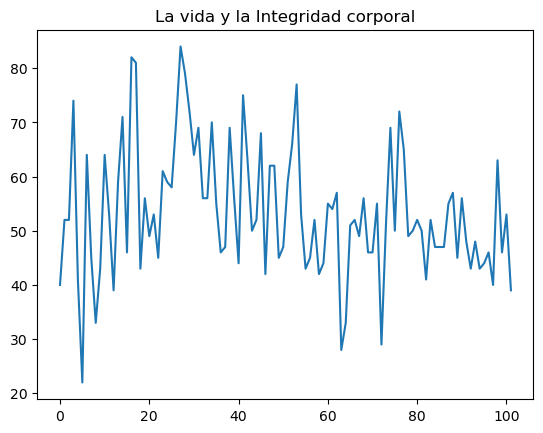

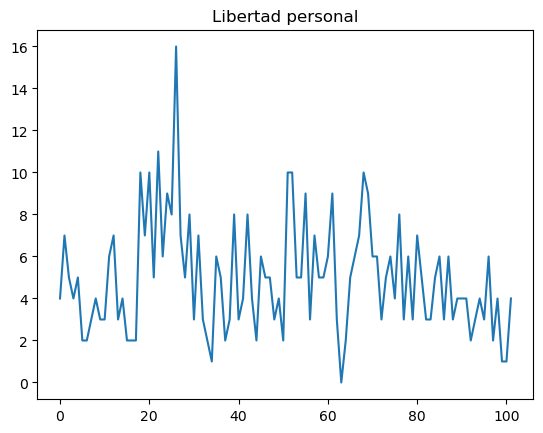

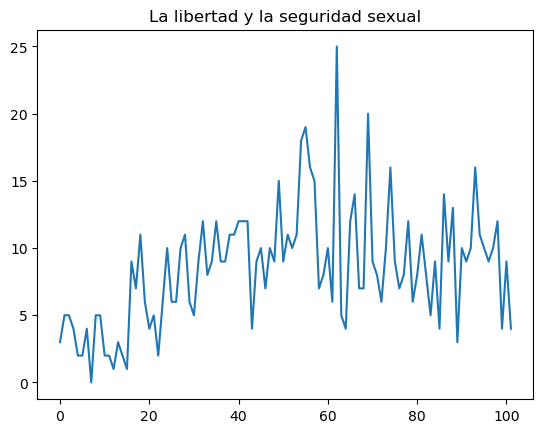

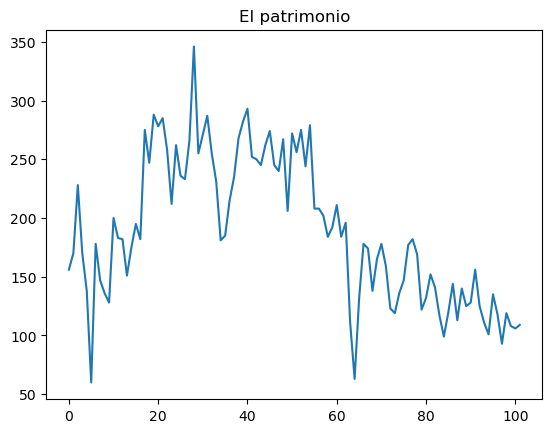

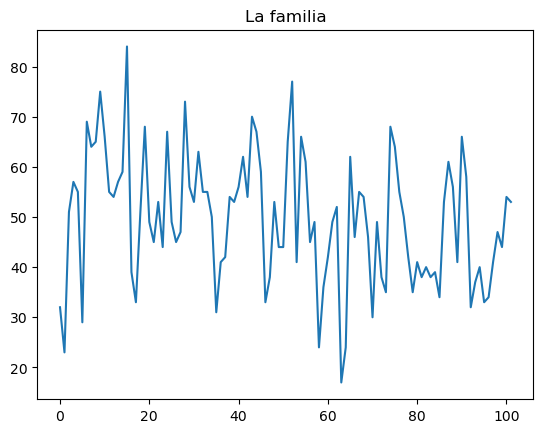

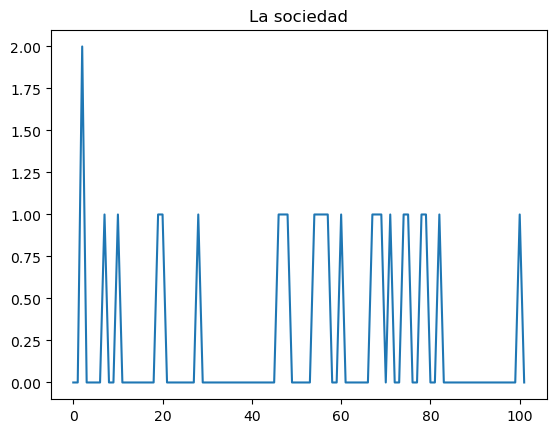

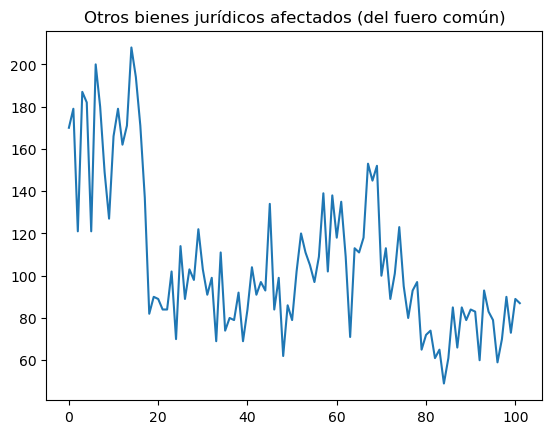

In [52]:
for a in cardenas['Bien juridico'].unique():
        fig, ax = plt.subplots()
        ax.plot(range(cardenas.loc[cardenas['Bien juridico']==a].iloc[:,2:].values.shape[1]),
                cardenas.loc[cardenas['Bien juridico']==a].iloc[:,2:].values[0])
        ax.set_title(a)

In [40]:
cardenas.loc[cardenas['Bien juridico']=='La vida y la Integridad corporal'].iloc[:,2:].values[0]

array([40, 52, 52, 74, 41, 22, 64, 45, 33, 43, 64, 53, 39, 59, 71, 46, 82,
       81, 43, 56, 49, 53, 45, 61, 59, 58, 70, 84, 79, 72, 64, 69, 56, 56,
       70, 55, 46, 47, 69, 56, 44, 75, 63, 50, 52, 68, 42, 62, 62, 45, 47,
       59, 66, 77, 53, 43, 45, 52, 42, 44, 55, 54, 57, 28, 33, 51, 52, 49,
       56, 46, 46, 55, 29, 51, 69, 50, 72, 65, 49, 50, 52, 50, 41, 52, 47,
       47, 47, 55, 57, 45, 56, 48, 43, 48, 43, 44, 46, 40, 63, 46, 53, 39],
      dtype=object)